In [1]:
#import stuff

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#define the function
#intial price, start formula from here.
#every new price needs to be appended to prices


def get_gbm(so,mu,sigma,t,dt,n):
    
    path = []
    
    for i in range(n):
    
        price = [so]
        time=0
    
        while(time+dt<=t):
        
            new_price = price[-1]*np.exp((mu-0.5*(sigma**2))*dt + sigma*(np.random.normal(0,np.sqrt(dt))))
            price.append(new_price)
            time+=dt
        
        if(t-time>0):
            new_price = price[-1]*np.exp((mu-0.5*(sigma**2))*(t-time) + sigma*(np.random.normal(0,np.sqrt(t-time))))
            price.append(new_price)
        
        path.append(price)
    
    return path
        

In [5]:
so = 100
mu = 0.08
sigma = 0.3
t = 1
dt = 1/252
n = 100

sample_paths = get_gbm(so,mu,sigma,t,dt,n)
print(len(sample_paths))
print(len(sample_paths[56]))
#print(sample_paths)

100
254


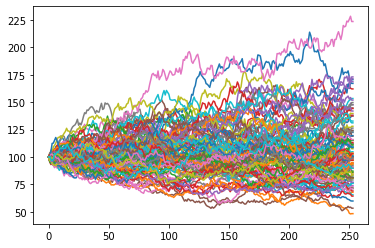

In [6]:
for path in sample_paths:
    plt.plot(path)

In [12]:
#print(sample_paths[56])

In [34]:
def get_options(so,r,sigma,t,dt,n,k):
    
    path = []
    result = []
    for i in range(n):
    
        price = [so]
        calls = []
        time=0
        
        while(time+dt<=t):
        
            new_price = price[-1]*np.exp((r-0.5*(sigma**2))*dt + sigma*(np.random.normal(0,np.sqrt(dt))))
            price.append(new_price)
            time+=dt
        
    
            
            d1=(np.log(price[-1]/k) + (r+(sigma**2)/2))/sigma*np.sqrt(dt)
            d2=(np.log(price[-1]/k) + (r-(sigma**2)/2))/sigma*np.sqrt(dt)
            
            c = price[-1]*(norm.cdf(d1)) - k*(np.exp(-r*dt)*(norm.cdf(d2)))
            calls.append(c)
        
        path.append(price)
        result.append(calls)
    return result
    

In [35]:
so = 100
r = 0.08
sigma = 0.3
t = 1
dt = 1/252
n = 100
k = 105
sample_calls = get_options(so,r,sigma,t,dt,n,k)


In [37]:
# print(sample_calls)

In [9]:
print(len(sample_calls[4]))

252


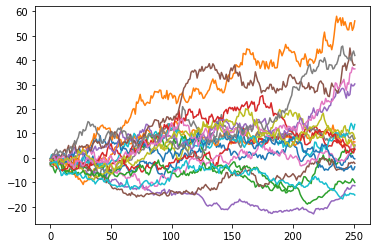

In [10]:
for i in sample_calls:
    plt.plot(i)

In [14]:
#new gbm

def new_gbm(so,mu,sigma,t,dt,n):
    
    path = []
    
    for i in range(n):
    
        price = [so]
        time=0
    
        while(time+dt<=t):
        
            new_price = price[-1]*np.exp( mu*dt + sigma*np.random.normal(0,dt) )
            price.append(new_price)
            time+=dt
        
        if(t-time>0):
            new_price = price[-1]*np.exp( mu*dt + sigma*np.random.normal(0,dt) )
            #new_price = price[-1]*np.exp((mu-0.5*(sigma**2))*(t-time) + sigma*(np.random.normal(0,np.sqrt(t-time))))
            price.append(new_price)
        
        
        path.append(price)
    
    return path
    
    

In [15]:
so = 100
mu = 0.08
sigma = 0.3
t = 1
dt = 1/252
n = 100

sample_paths = new_gbm(so,mu,sigma,t,dt,n)
print(len(sample_paths))
print(len(sample_paths[56]))

100
254


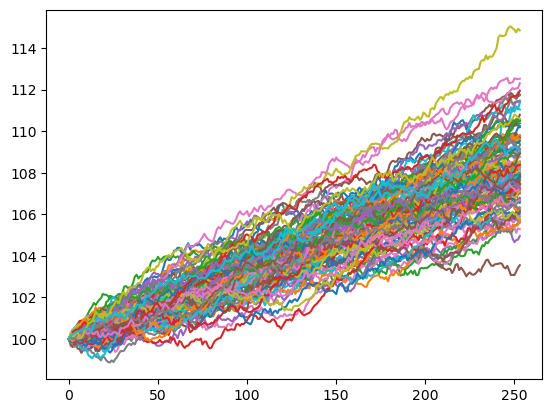

In [16]:
for path in sample_paths:
    plt.plot(path)

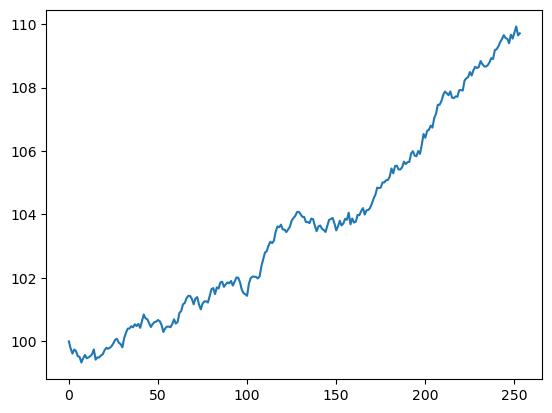

In [17]:
#sample_paths has 100 lists, each list has 254 numbers representing stock prices each day!

#let's calculate avg. call option price for one such stock path,ie, sample_paths[45] for example

plt.plot(sample_paths[45])

In [18]:
#calculate daily returns for path 45

simple_daily_returns = []
log_daily_returns = []

for i in range(1,len(sample_paths[45])):
        
        y = (sample_paths[45][i] - sample_paths[45][i-1])/sample_paths[45][i-1]
        y*=100
        simple_daily_returns.append(y)# appending just one path
        
#print(daily_returns)
# print(len(simple_daily_returns)) #252



for i in range(1,len(sample_paths[45])):
    y = np.log(sample_paths[45][i]/sample_paths[45][i-1])
    log_daily_returns.append(y)
# print(log_daily_returns)
# print(len(log_daily_returns)) #253

st = so*np.exp(sum(log_daily_returns))
print(st) #same as print(sample_paths[45][-1])
print(sample_paths[45][-1])

109.71025968452616
109.71025968452612


In [19]:
#calculate log returns and then st for all stock price paths, namely all 254 of them. easy, no sweat!

log_returns = []

for i in range(0,len(sample_paths)):
    returns = []
    for j in range(1,len(sample_paths[i])):
        y = np.log(sample_paths[i][j]/sample_paths[i][j-1])
        returns.append(y)
    log_returns.append(returns)

        



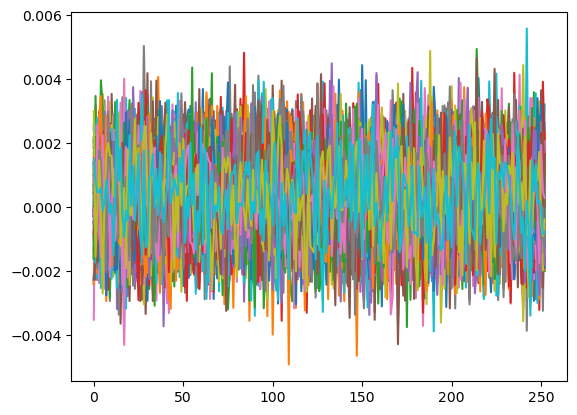

In [20]:
for y in log_returns:
    plt.plot(y)

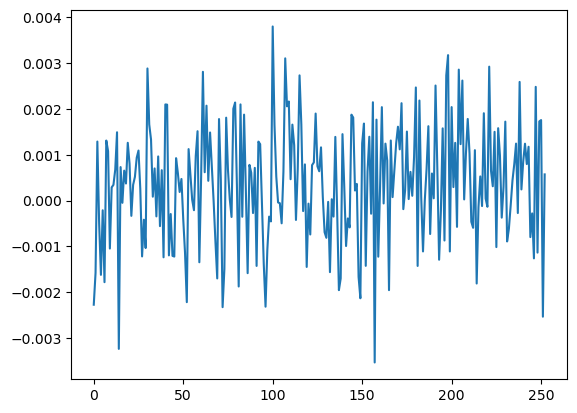

In [21]:
plt.plot(log_returns[45])

In [22]:
# print((log_returns[45]))

st = []

for i in range(0,len(log_returns)):
    x = np.exp(sum(log_returns[i]))
    
    st.append(x*100)

In [23]:
st[45]

109.71025968452616

In [24]:
# calculate call_prices
cp = []
for s in st:
    if s>105:
        cp.append(s-105)
    else:
        cp.append(0)

call_price = sum(cp)/len(cp)
print(call_price)

3.3604706900734227
